In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#country-names-and-codes.csv
gdp=pd.read_csv('gdp_1960_2020.csv')

In [3]:
gdp.head()

,year,rank,country,state,gdp,gdp_percent
0,1960,1,the United States,America,543300000000,0.468483
1,1960,2,United Kingdom,Europe,73233967692,0.063149
2,1960,3,France,Europe,62225478000,0.053656
3,1960,4,China,Asia,59716467625,0.051493
4,1960,5,Japan,Asia,44307342950,0.038206


In [4]:
gdp.columns

Index(['year', 'rank', 'country', 'state', 'gdp', 'gdp_percent'], dtype='object')

In [5]:
gdp['country'].unique()

array(['the United States', 'United Kingdom', 'France', 'China', 'Japan',
       'Canada', 'Italy', 'India', 'Australia', 'Sweden', 'Brazil',
       'Turkey', 'Mexico', 'Netherlands', 'Spain', 'Belgium',
       'Switzerland', 'Venezuela', 'South Africa', 'Philippines',
       'Austria', 'Denmark', 'New Zealand', 'Finland', 'Norway', 'Greece',
       'Bangladesh', 'Iran', 'Nigeria', 'Chile', 'Columbia',
       'South Korea', 'Pakistan', 'Congo (gold)', 'Portugal', 'Thailand',
       'Algeria', 'Israel', 'Peru', 'Morocco', 'Ireland', 'Malaysia',
       'Puerto Rico', 'Iraq', 'Sri Lanka', 'Hong Kong', 'Sudan',
       'Uruguay', 'Garner', 'Zimbabwe', 'Guatemala', 'Ecuador', 'Syria',
       'Senegal', 'Kenya', 'Zambia', 'Singapore', 'Luxembourg', 'Jamaica',
       'Madagascar', 'Dominica', 'Cambodia', 'Cameroon', 'Bolivia',
       "C ô te d'Ivoire", 'Afghanistan', 'Panama', 'Trinidad and Tobago',
       'Nepal', 'Costa Rica', 'Niger', 'Uganda', 'Honduras',
       'Burkina Faso', 'Sierra Leo

In [7]:
india_gdp=gdp[gdp['country']=='India']
india_gdp

,year,rank,country,state,gdp,gdp_percent
7,1960,8,India,Asia,37029883875,0.031931
110,1961,8,India,Asia,39232435784,0.032502
213,1962,8,India,Asia,42161481858,0.031930
317,1963,7,India,Asia,48421923458,0.034050
422,1964,7,India,Asia,56480289940,0.036255
...,...,...,...,...,...,...
9153,2016,7,India,Asia,2294797980509,0.030479
9357,2017,6,India,Asia,2651472946375,0.033085
9562,2018,7,India,Asia,2701111782774,0.031710
9764,2019,5,India,Asia,2870504096717,0.033278


In [8]:
india_gdp.drop(['rank','state','gdp_percent'], axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
india_gdp

,year,country,gdp
7,1960,India,37029883875
110,1961,India,39232435784
213,1962,India,42161481858
317,1963,India,48421923458
422,1964,India,56480289940
...,...,...,...
9153,2016,India,2294797980509
9357,2017,India,2651472946375
9562,2018,India,2701111782774
9764,2019,India,2870504096717


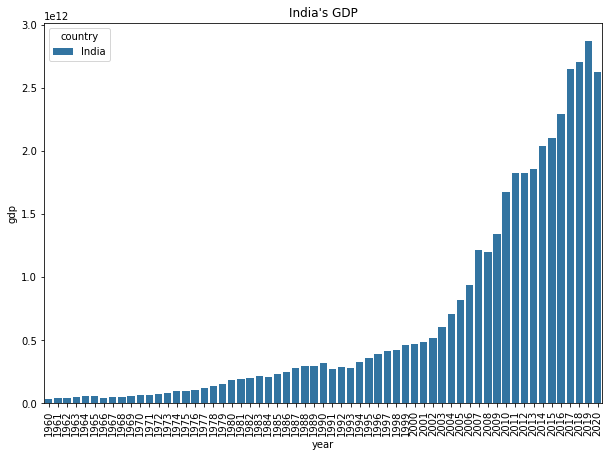

In [10]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'year',
y = 'gdp',
hue = 'country',
data = india_gdp)
plt.xticks(rotation = 90)
plt.title("India's GDP")
plt.show()

In [11]:
x1 = india_gdp.drop(['gdp', 'country'], axis=1)
y1 = india_gdp['gdp']

In [12]:
print(x1.shape)
print(y1.shape)

(61, 1)
(61,)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.2)

In [14]:
model_india=LinearRegression()
model_india.fit(x1,y1)

LinearRegression()

In [15]:
print("Coefficient: ",model_india.coef_)
print("intercept: ",model_india.intercept_)
pred = model_india.predict(x1)

Coefficient:  [3.87539925e+10]
intercept:  -76462096733309.64


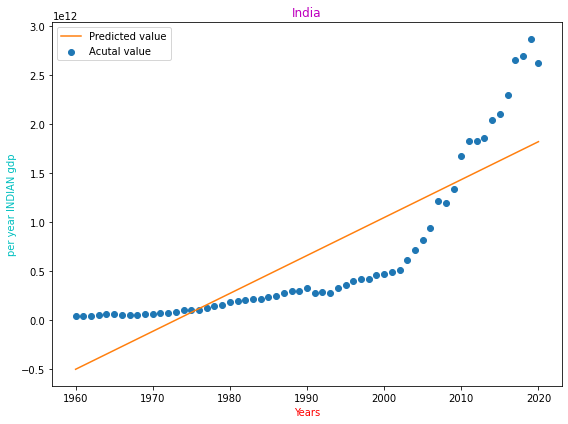

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x1,y1,label='Acutal value')
plt.plot(x1,pred,color='tab:orange',label='Predicted value')
plt.legend()
plt.title("India",color='m')
plt.xlabel("Years",color='r')
plt.ylabel("per year INDIAN gdp",color='c')
plt.tight_layout()
plt.show()

In [17]:
years=[2021,2022,2023,2024,2025]
for i in years:
    print(model_india.predict([[i]]))

[1.85972215e+12]
[1.89847614e+12]
[1.93723013e+12]
[1.97598412e+12]
[2.01473812e+12]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

In [18]:
from sklearn.linear_model import LogisticRegression
logimodel_india=LogisticRegression()
logimodel_india.fit(x1,y1)

LogisticRegression()

In [19]:
pred_logi = logimodel_india.predict(x1)

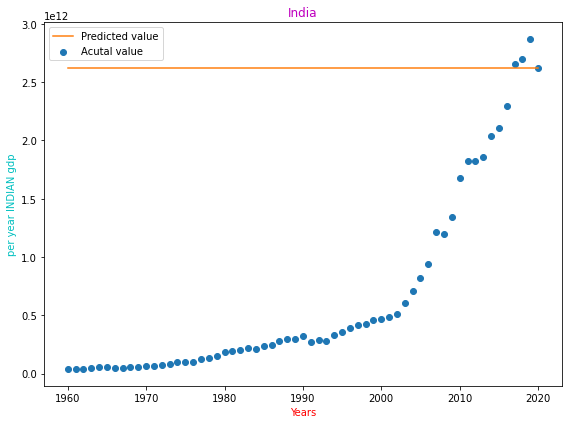

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(x1,y1,label='Acutal value')
plt.plot(x1,pred_logi,color='tab:orange',label='Predicted value')
plt.legend()
plt.title("India",color='m')
plt.xlabel("Years",color='r')
plt.ylabel("per year INDIAN gdp",color='c')
plt.tight_layout()
plt.show()

In [21]:
years=[2021,2022,2023,2024,2025]
for i in years:
    print(logimodel_india.predict([[i]]))

[2622983732006]
[2622983732006]
[2622983732006]
[2622983732006]
[2622983732006]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 